In [95]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
import urllib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # Any results you write to the current directory are saved as output.

sns.set()
%matplotlib inline

# This checks if the notebook is executed on Kaggle or on your local machine and
# acts accordingly with filenames. On Kaggle the dataset is already managed by a managed
# and downloaded to (URLs are linked) a dataset there.
try:
    os.environ['KAGGLE_DATA_PROXY_TOKEN']
except KeyError:
    # daily infections in Germany
    url_daily_corona = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"

    # infections per 100k residents in German states
    url_corona_bl_100k = "https://opendata.arcgis.com/datasets/ef4b445a53c1406892257fe63129a8ea_0.csv"

    # infections per 100k residents in German provinces
    url_corona_provinces = "https://opendata.arcgis.com/datasets/917fc37a709542548cc3be077a786c17_0.csv"

    fname1 = "./RKI_covid19_daily_de.csv"
    fname2 = "./RKI_covid19_states_100k.csv"
    fname3 = "./RKI_covid19_provinces_100k.csv"

    urllib.request.urlretrieve(url_daily_corona, fname1)
    urllib.request.urlretrieve(url_daily_corona, fname2)
    urllib.request.urlretrieve(url_daily_corona, fname3)
    
    fname4 = "./covid19_events_measures.csv"
    
else:
    dirname = "/kaggle/input/covid19-data-germany-robert-koch-institute/"
    # daily infections in Germany
    fname1 = dirname + "dd4580c810204019a7b8eb3e0b329dd6_0.csv"

    # infections per 100k residents in German states
    fname2 = dirname + "ef4b445a53c1406892257fe63129a8ea_0.csv"

    # infections per 100k residents in German provinces
    fname3 = dirname + "917fc37a709542548cc3be077a786c17_0.csv"


df_daily_data = pd.read_csv(fname1, parse_dates=["Meldedatum"], date_parser=lambda ts: pd.Timestamp(ts).strftime('%Y-%m-%d'))
df_measures_events = pd.read_csv(fname4, parse_dates=["Date"])

df_daily_data.sort_values(['Meldedatum'], inplace=True)
df_measures_events.sort_values(['Date'], inplace=True)

In [96]:
df_daily_data

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall
4942,8,Baden-Württemberg,LK Rastatt,A00-A04,W,1,0,475225,2020-01-24,8216,29.03.2020 00:00,0,-9
12074,9,Bayern,LK Landsberg a.Lech,A15-A34,M,1,0,478357,2020-01-28,9181,29.03.2020 00:00,0,-9
12700,9,Bayern,LK Starnberg,A35-A59,M,1,0,478983,2020-01-28,9188,29.03.2020 00:00,0,-9
9925,9,Bayern,LK Fürstenfeldbruck,A15-A34,M,1,0,478208,2020-01-29,9179,29.03.2020 00:00,0,-9
9110,9,Bayern,SK München,A15-A34,W,1,0,477393,2020-01-29,9162,29.03.2020 00:00,0,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,3,Niedersachsen,LK Stade,A35-A59,M,1,0,466272,2020-03-28,3359,29.03.2020 00:00,1,-9
21447,13,Mecklenburg-Vorpommern,SK Rostock,A60-A79,W,1,0,484573,2020-03-28,13003,29.03.2020 00:00,1,-9
12380,9,Bayern,LK München,A35-A59,W,3,0,478663,2020-03-28,9184,29.03.2020 00:00,1,-9
12348,9,Bayern,LK München,A35-A59,M,1,0,478631,2020-03-28,9184,29.03.2020 00:00,1,-9


In [97]:
print("Measures taken and events/incidents concerning Covid19."
      + "These might show a connection to the falling or rising of the curves:")
df_measures_events

Measures taken and events/incidents concerning Covid19.These might show a connection to the falling or rising of the curves:


,Date,In_Short,State,Description
0,2020-03-16,"Schools, day care centers closed.",Alle,"Schools, day care centers closed."
1,2020-03-16,Entry bans and strict border controls.,Alle,Germany has decided on entry bans and strict c...
2,2020-03-20,"Quarantine Bavaria, only vital locations open.",Bayern,Kontaktverbot blablabla.
3,2020-03-22,"Quarantine country-wide, only vital locations ...",Alle,Kontaktverbot blablabla.


In [98]:
print("Total sum of cases in Germany:")
df_daily_data["AnzahlFall"].sum()

Total sum of cases in Germany:


52534

In [99]:
print("Describe number of cases per day in Germany:")
df_daily_data.groupby("Meldedatum").sum()["AnzahlFall"].describe()

Describe number of cases per day in Germany:


count      45.000000
mean     1167.422222
std      1658.485488
min         1.000000
25%         3.000000
50%       147.000000
75%      1969.000000
max      5356.000000
Name: AnzahlFall, dtype: float64

In [100]:
# def annotationsForDate(df, date):
#     """
#     Takes the measures df and a time index and returns all the short
#     measure descriptions as a string for the annotations below
#     """
#     query = df_measures_events.query("Date == '{}'".format(date))
#     ann = ""
#     for i in query.index:
#         state = ""
#         if query["State"].iloc[i]:
#             state = query["State"].iloc[i] + ": "
#         s = query["In_Short"].iloc[i]
#         ann += s + '\n'
#     return ann.rstrip()

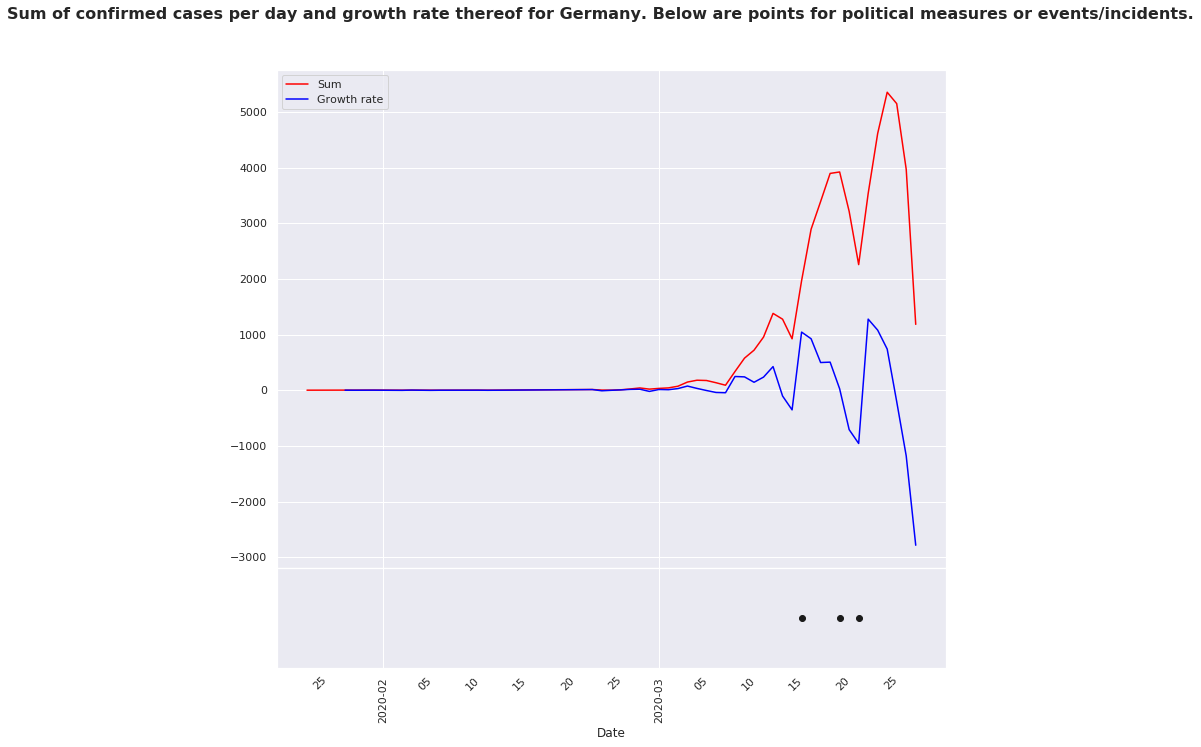

In [101]:
gr_day_reported = df_daily_data.groupby('Meldedatum')

# TODO: make these relative to screen size somehow
figsize = (12,11)
fig, ax = plt.subplots(2, 1, figsize=figsize, sharex=True, gridspec_kw={'height_ratios': [5, 1]})
fig.subplots_adjust(hspace=0.0)
suptitel_attr = {"fontsize" : 16, "fontweight" : "bold", "ha" : "center", "va" : "bottom", "y" : 0.94}

# set plot stuff
fig.suptitle("Sum of confirmed cases per day and growth rate thereof for Germany. Below are points "
             + "for political measures or events/incidents.", **suptitel_attr)

for axis in ax.flat:
    axis.set_xlabel('Date')
    rule = mpl.dates.rrulewrapper(mpl.dates.MONTHLY,  bymonthday=(5, 10, 15, 20, 25))
    axis.xaxis.set_minor_locator(mpl.dates.RRuleLocator(rule))
    axis.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%d"))
    axis.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=1))
    axis.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m'))

ax[1].yaxis.set_minor_locator(mpl.ticker.NullLocator())
ax[1].yaxis.set_major_locator(mpl.ticker.NullLocator())

sum_cases_per_day = gr_day_reported['AnzahlFall'].sum()
growth_rate = sum_cases_per_day.diff()

ax[0].plot(sum_cases_per_day, color='red', label='Sum')
ax[0].plot(growth_rate, color='blue', label='Growth rate')

plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax[0].xaxis.get_minorticklabels(), rotation=45)


for d in df_measures_events["Date"].unique():
    #s = annotationsForDate(df_measures_events, d)
    #axs[1].annotate(s = "bla", xy=(d, sum_cases_per_day[d]), xytext=(-50,-10), xycoords="data")
    pass

ax[1].scatter(df_measures_events["Date"].unique(), len(df_measures_events["Date"].unique()) * [100], c='k')

for axis in ax.flat:
    plt.setp(axis.xaxis.get_majorticklabels(), rotation=90)
    plt.setp(axis.xaxis.get_minorticklabels(), rotation=45)

ax[0].legend()

In [102]:
print("Total sum of cases per German state")
df_daily_data.groupby(['Bundesland'])["AnzahlFall"].sum()

Total sum of cases per German state


Bundesland
Baden-Württemberg          9794
Bayern                    12875
Berlin                     2360
Brandenburg                 721
Bremen                      275
Hamburg                    1846
Hessen                     2605
Mecklenburg-Vorpommern      348
Niedersachsen              3450
Nordrhein-Westfalen       11395
Rheinland-Pfalz            2395
Saarland                    560
Sachsen                    1616
Sachsen-Anhalt              592
Schleswig-Holstein         1005
Thüringen                   697
Name: AnzahlFall, dtype: int64

In [103]:
print("Describe sum of daily cases per day per German state.")
df_daily_data.groupby(['Bundesland', "Meldedatum"])['AnzahlFall'].sum().unstack().T.fillna(0).describe().round(decimals=0)

Describe sum of daily cases per day per German state.


Bundesland,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
count,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0
mean,218.0,286.0,52.0,16.0,6.0,41.0,58.0,8.0,77.0,253.0,53.0,12.0,36.0,13.0,22.0,15.0
std,325.0,450.0,78.0,23.0,9.0,57.0,90.0,13.0,117.0,342.0,77.0,19.0,56.0,22.0,33.0,25.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,32.0,17.0,5.0,1.0,0.0,3.0,4.0,1.0,6.0,58.0,2.0,0.0,2.0,0.0,1.0,0.0
75%,325.0,456.0,72.0,23.0,11.0,75.0,84.0,11.0,106.0,424.0,114.0,20.0,41.0,15.0,35.0,24.0
max,1120.0,1543.0,284.0,82.0,40.0,188.0,288.0,43.0,384.0,1079.0,258.0,69.0,179.0,79.0,105.0,75.0


In [104]:
# Get daily cases and growth rate per German state

loc_unknown_col = "-nicht erhoben-"
state_names = df_daily_data['Bundesland'].unique()
# remove column name for unknown location of the case
index = np.where(state_names == loc_unknown_col)
state_names = np.delete(state_names, index)

states_daily = df_daily_data.groupby(['Meldedatum', 'Bundesland'])['AnzahlFall'].sum()
df_per_state_daily = pd.DataFrame()
for state in state_names:
    df_per_state_daily[state] = states_daily.unstack()[state].fillna(0)

In [105]:
# TODO: make these relative to screen size somehow
figsize = (19,16)
ax_label_fontsize = 10.0
legend_fontsize = 8.0
major_tick_fontsize = 8.0
minor_tick_fontsize = 7.0
tick_monthdays = (10, 20)

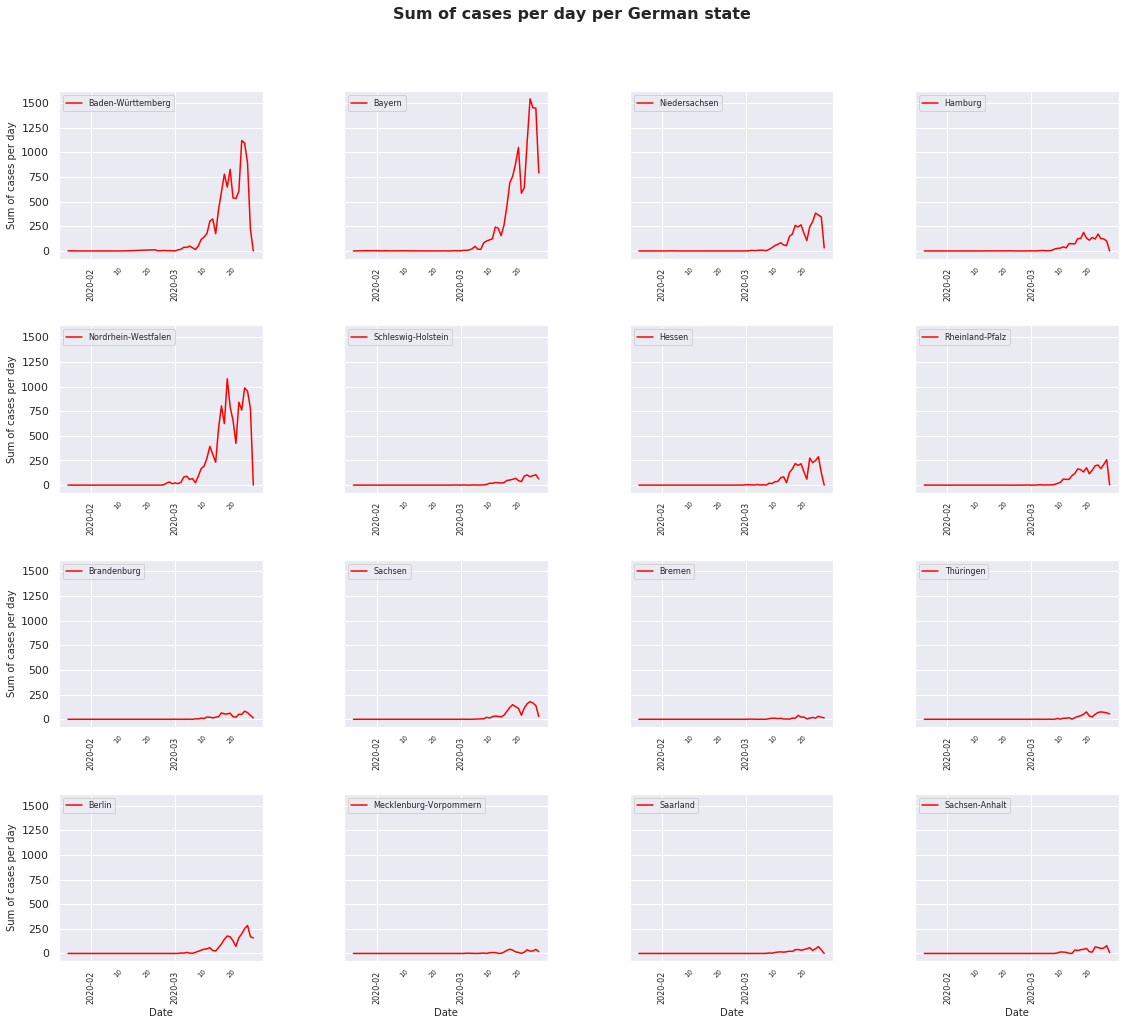

In [106]:
# Plot sum of confirmed cases per day per German state

fig, ax = plt.subplots(4, 4, sharey=True, figsize=figsize)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

fig.suptitle("Sum of cases per day per German state", **suptitel_attr)

for axis in ax.flat:
    rule = mpl.dates.rrulewrapper(mpl.dates.MONTHLY,  bymonthday=tick_monthdays)
    axis.xaxis.set_minor_locator(mpl.dates.RRuleLocator(rule))
    axis.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%d"))
    axis.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=1))
    axis.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m'))
    
    for tick in axis.xaxis.get_major_ticks():
            tick.label.set_fontsize(tick_fontsize)

for plt_row in ax:
    plt_row[0].set_ylabel('Sum of cases per day', fontsize=ax_label_fontsize)
    
for column_plots in ax.T:
    column_plots[-1].set_xlabel('Date', fontsize=ax_label_fontsize)
    
ix = 0
for subp in ax.flat:
    state = state_names[ix]
    subp.plot(df_per_state_daily[state], color='red', label = "{}".format(state))
    subp.legend(fontsize=legend_fontsize, loc="upper left")
    plt.setp(subp.xaxis.get_majorticklabels(), rotation=90)
    plt.setp(subp.xaxis.get_minorticklabels(), rotation=45)
    for tick in subp.xaxis.get_major_ticks():
            tick.label.set_fontsize(major_tick_fontsize)
    for tick in subp.xaxis.get_minor_ticks():
            tick.label.set_fontsize(minor_tick_fontsize)
    ix += 1
        

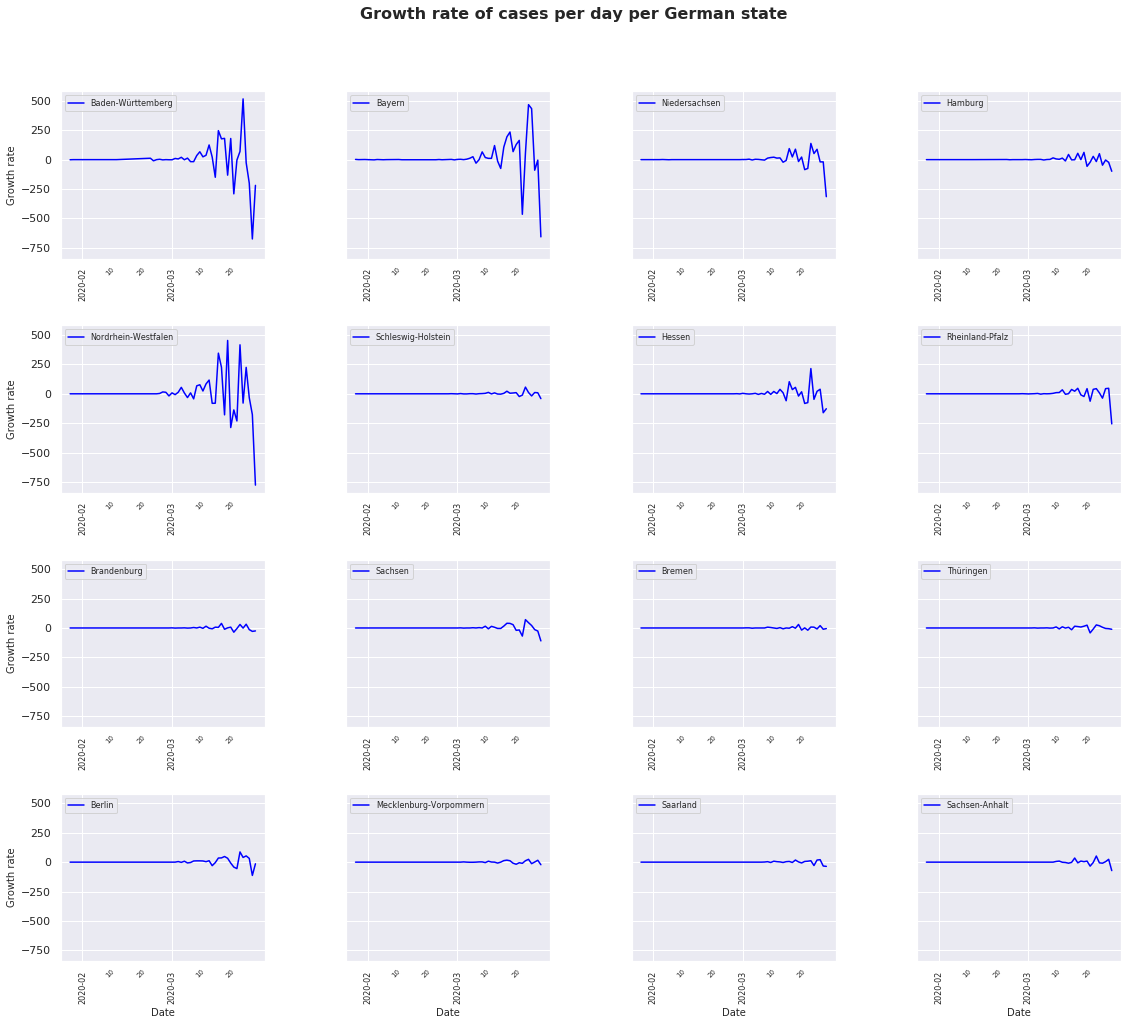

In [107]:
# Plot growth rate of daily confirmed cases per German state

fig, ax = plt.subplots(4, 4, sharey=True, figsize=figsize)
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

fig.suptitle("Growth rate of cases per day per German state", **suptitel_attr)

for axis in ax.flat:
    rule = mpl.dates.rrulewrapper(mpl.dates.MONTHLY,  bymonthday=tick_monthdays)
    axis.xaxis.set_minor_locator(mpl.dates.RRuleLocator(rule))
    axis.xaxis.set_minor_formatter(mpl.dates.DateFormatter("%d"))
    axis.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonthday=1))
    axis.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y-%m'))
    
    for tick in axis.xaxis.get_major_ticks():
            tick.label.set_fontsize(tick_fontsize)

for plt_row in ax:
    plt_row[0].set_ylabel('Growth rate', fontsize=ax_label_fontsize)
    
for column_plots in ax.T:
    column_plots[-1].set_xlabel('Date', fontsize=ax_label_fontsize)
    
ix = 0
for subp in ax.flat:
    state = state_names[ix]
    subp.plot(df_per_state_daily[state].diff(), color='blue', label = "{}".format(state))
    subp.legend(fontsize=legend_fontsize, loc="upper left")
    plt.setp(subp.xaxis.get_majorticklabels(), rotation=90)
    plt.setp(subp.xaxis.get_minorticklabels(), rotation=45)
    for tick in subp.xaxis.get_major_ticks():
            tick.label.set_fontsize(major_tick_fontsize)
    for tick in subp.xaxis.get_minor_ticks():
            tick.label.set_fontsize(minor_tick_fontsize)
    ix += 1